In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as plt

In [2]:
data = pd.read_csv('bre.csv')
data.head(3)

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018


In [3]:
data.shape

(1047, 13)

In [4]:
data.columns

Index(['SALES_ID', 'SALES_REP', 'EMAILS', 'BRANDS', 'PLANT_COST', 'UNIT_PRICE',
       'QUANTITY', 'COST', 'PROFIT', 'COUNTRIES', 'REGION ', 'MONTHS',
       'YEARS'],
      dtype='object')

##                         Profit Analysis

### 1. Within the space of the last three years, what was the profit worth of the breweries, inclusive of the anglophone and the francophone territories?

In [5]:
total_profit = data['PROFIT'].sum()
print('The Profit worth of breweries in the last three years is:', total_profit)

The Profit worth of breweries in the last three years is: 105587420


### 2. Compare the total profit between these two territories in order for the territory manager, Mr.Stone make strategic decision that will aid profit maximization in 2020.

In [6]:
data['COUNTRIES'].unique()

array(['Ghana', 'Nigeria', 'Togo', 'Benin', 'Senegal'], dtype=object)

In [7]:
data['territories'] = data['COUNTRIES'].map({'Ghana':'anglophone_country', 'Nigeria':'anglophone_country', 'Togo':'francophone_country',
                                             'Benin':'francophone_country', 'Senegal':'francophone_country'})

In [8]:
data.groupby(['territories'])['PROFIT'].sum().reset_index()

,territories,PROFIT
0,anglophone_country,42389260
1,francophone_country,63198160


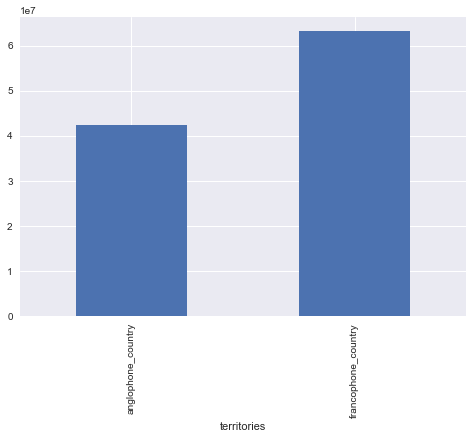

In [9]:
data.groupby(['territories'])['PROFIT'].sum().plot(kind = 'bar')

From all indications we can see that the francophones countries are making more profit compared to the english speaking countries

### 3. Country that generated the highest profit in 2019

In [10]:
year_2019 = data[data['YEARS'] == 2019]
year_2019.head(3)

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,territories
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,anglophone_country
5,10106,Jardine,jard@gmail.com,beta malt,80,150,798,119700,55860,Ghana,northcentral,June,2019,anglophone_country
8,10109,Morgan,morganny@gmail.com,budweiser,250,500,700,350000,175000,Benin,southsouth,September,2019,francophone_country


In [11]:
year_2019.groupby(['COUNTRIES'])['PROFIT'].sum().reset_index().sort_values(by = 'PROFIT')

,COUNTRIES,PROFIT
2,Nigeria,4805320
0,Benin,5273340
4,Togo,6109960
3,Senegal,6687560
1,Ghana,7144070


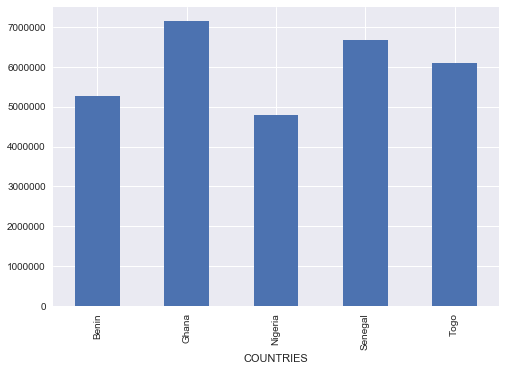

In [12]:
year_2019.groupby(['COUNTRIES'])['PROFIT'].sum().plot(kind = 'bar')

The country with the highest profit in 2019 is Ghana

### 4. Help him find the year with the highest profit.

In [13]:
data.groupby(['YEARS'])['PROFIT'].sum().reset_index().sort_values(by = 'PROFIT')

,YEARS,PROFIT
2,2019,30020250
1,2018,37063850
0,2017,38503320


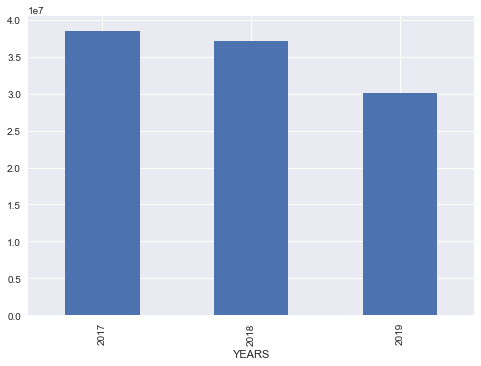

In [14]:
data.groupby(['YEARS'])['PROFIT'].sum().plot(kind = 'bar')

The year with the highest profit is 2017

### 5. Which month in the three years were the least profit generated?

In [15]:
data.groupby(['MONTHS'])['PROFIT'].sum().reset_index().sort_values(by = 'PROFIT')

,MONTHS,PROFIT
0,April,8573830
11,September,8702660
4,January,8722990
1,August,8730940
10,October,8767100
8,May,8772250
5,July,8787010
2,December,8787290
9,November,8820330
6,June,8828440


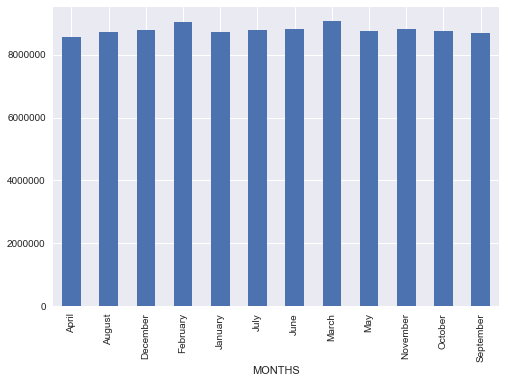

In [16]:
data.groupby(['MONTHS'])['PROFIT'].sum().plot(kind = 'bar')

April appears to be the month was the least profit generated over the 3 years specified with little margin difference across the months

### 6. What was the minimum profit in the month of December 2018?

In [17]:
year_2018 = data[data['YEARS'] == 2018]
year_2018_dec = year_2018[year_2018['MONTHS'] == 'December']
year_2018_dec.head(3)

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,territories
71,10172,Jones,jone.ai@yahoo.com,budweiser,250,500,869,434500,217250,Nigeria,northcentral,December,2018,anglophone_country
95,10196,Sorvino,sorvi2000@gmail.com,hero,150,200,959,191800,47950,Ghana,northcentral,December,2018,anglophone_country
107,10208,Jardine,jard@gmail.com,castle lite,180,450,878,395100,237060,Togo,northcentral,December,2018,francophone_country


In [18]:
dec_2018_min_profit = year_2018_dec['PROFIT'].min()
print('The minimum profit in the month of december 2018 is:', dec_2018_min_profit)

The minimum profit in the month of december 2018 is: 38150


### 7. Compare the profit in percentage for each of the month in 2019

In [19]:
m = year_2019.groupby(['MONTHS'])['PROFIT'].sum().reset_index().sort_values(by = 'PROFIT')
m['Profit%'] =  m['PROFIT'].apply(lambda x : (x /total_profit )* 100)
m.head(3)

,MONTHS,PROFIT,Profit%
3,February,1366880,1.294548
11,September,1892600,1.792448
2,December,2048780,1.940364


### 8. Which particular brand generated the highest profit in Senegal?

In [20]:
senegal = data[data['COUNTRIES'] == 'Senegal']
senegal.head(3)

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,territories
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017,francophone_country
9,10110,Howard,howard_freeman@yahoo.com,castle lite,180,450,745,335250,201150,Senegal,northwest,October,2017,francophone_country
14,10115,Morgan,morganny@gmail.com,trophy,150,200,939,187800,46950,Senegal,southsouth,March,2018,francophone_country


In [21]:
senegal.groupby(['BRANDS'])['PROFIT'].sum().reset_index().sort_values(by = 'PROFIT')

,BRANDS,PROFIT
6,trophy,1278750
5,hero,1331600
4,grand malt,1525680
0,beta malt,1793750
3,eagle lager,2061680
1,budweiser,6480750
2,castle lite,7012980


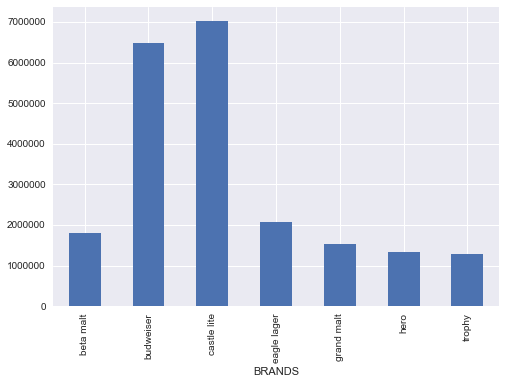

In [22]:
senegal.groupby(['BRANDS'])['PROFIT'].sum().plot(kind = 'bar');

Castle lite is the brand with the highest profit in senegal